Date
2014-03-16    6.333333
2014-03-16    6.333333
2014-03-16    7.000000
2014-03-16    6.400000
2014-03-16    6.166667
Name: mood, dtype: float64


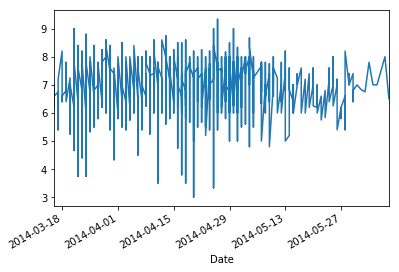

In [2]:
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('data6.csv', header=0)
print(series.head())
series.plot()
pyplot.show()

In [3]:
#Tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))

Date
2014-03-16         NaN
2014-03-16         NaN
2014-03-16    6.555556
2014-03-16    6.577778
2014-03-16    6.522222
2014-03-16    6.388889
2014-03-17    6.505556
2014-03-17    6.450000
2014-03-17    6.050000
2014-03-17    6.000000
Name: mood, dtype: float64


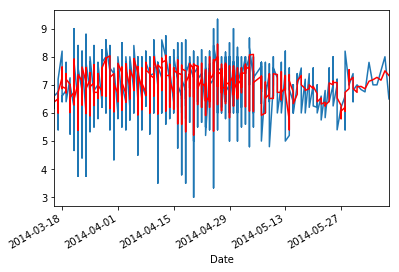

In [4]:
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
pyplot.show()
#raw observations are blue with the moving average transform in red

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [6]:

myyearmonth = mdates.DateFormatter('%m/%y')

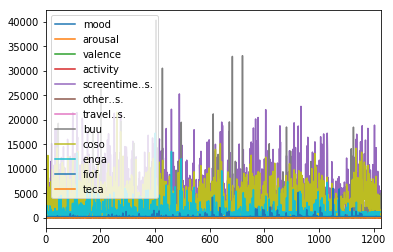

In [7]:

import pandas as pd
data = pd.read_csv('data6.csv')
data.head(10)
data.plot()
pyplot.show()

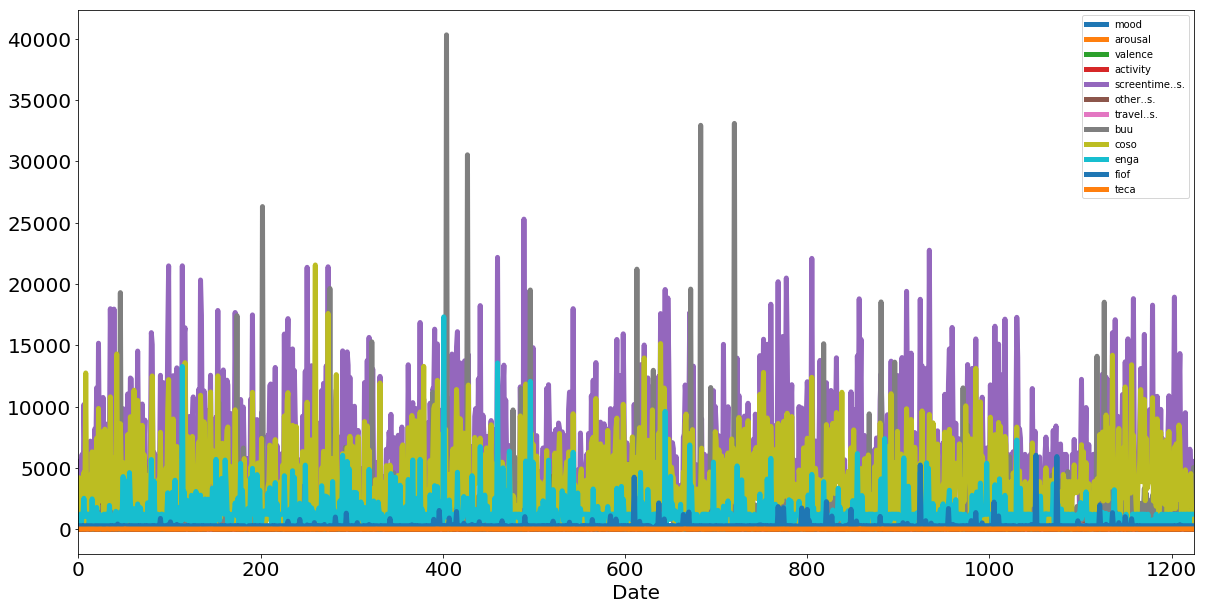

In [28]:
data.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20)
pyplot.show()

In [9]:
rolling = data.rolling(window=5).mean()
rolling.head(10)

,Date,mood,arousal,valence,activity,screentime..s.,other..s.,travel..s.,buu,coso,enga,fiof,teca
0,2014-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-03-16,6.446667,-0.716667,0.356667,0.119059,4781.893192,618.958609,256.420291,985.437211,2967.657337,667.181974,273.032357,3.633293
5,2014-03-16,6.500000,-0.876667,0.456667,0.119059,3874.306192,544.967809,256.420291,535.139611,2325.062337,892.425961,222.242285,3.233293
6,2014-03-17,6.583333,-0.643333,0.556667,0.128861,4796.650193,547.970609,256.420291,686.311011,2411.298337,1238.595561,222.242285,3.433293
7,2014-03-17,6.383333,-0.473333,0.386667,0.121723,5431.394393,566.370009,256.420291,827.439811,2321.530737,1199.837574,222.242285,2.916647
8,2014-03-17,6.183333,-0.273333,0.386667,0.099022,4730.951393,106.808409,256.420291,784.625811,4624.794537,1435.167161,222.242285,2.916647
9,2014-03-17,6.270000,-0.140000,0.480000,0.099022,4140.758000,211.998200,252.365833,675.426000,4138.841800,1435.167161,222.242285,3.633293


In [10]:
rolling = pd.DataFrame(rolling)
rolling.to_csv('rolling.csv', index=False, header=True)


In [11]:
from numpy import mean
from sklearn.metrics import mean_squared_error
series = Series.from_csv('data6.csv', header=0)

    


In [12]:
#Prepare situation
X = series.values
window = 5
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

In [13]:
#walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    y_hat = mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(y_hat)
    history.append(obs)
    print('Predicted = %f, Expected = %f' % (y_hat, obs))
    


Predicted = 6.446667, Expected = 6.600000
Predicted = 6.500000, Expected = 6.750000
Predicted = 6.583333, Expected = 6.000000
Predicted = 6.383333, Expected = 5.400000
Predicted = 6.183333, Expected = 6.600000
Predicted = 6.270000, Expected = 6.400000
Predicted = 6.230000, Expected = 7.200000
Predicted = 6.320000, Expected = 8.200000
Predicted = 6.760000, Expected = 7.500000
Predicted = 7.180000, Expected = 6.400000
Predicted = 7.140000, Expected = 7.000000
Predicted = 7.260000, Expected = 7.200000
Predicted = 7.260000, Expected = 6.600000
Predicted = 6.940000, Expected = 6.800000
Predicted = 6.800000, Expected = 6.750000
Predicted = 6.870000, Expected = 6.800000
Predicted = 6.830000, Expected = 7.000000
Predicted = 6.790000, Expected = 7.800000
Predicted = 7.030000, Expected = 7.400000
Predicted = 7.150000, Expected = 6.400000
Predicted = 7.080000, Expected = 7.250000
Predicted = 7.170000, Expected = 7.200000
Predicted = 7.210000, Expected = 5.250000
Predicted = 6.700000, Expected = 6

Predicted = 7.546667, Expected = 7.250000
Predicted = 7.516667, Expected = 6.000000
Predicted = 7.276667, Expected = 7.666667
Predicted = 7.276667, Expected = 7.000000
Predicted = 7.116667, Expected = 8.200000
Predicted = 7.223333, Expected = 6.400000
Predicted = 7.053333, Expected = 7.000000
Predicted = 7.253333, Expected = 7.000000
Predicted = 7.120000, Expected = 6.800000
Predicted = 7.080000, Expected = 6.800000
Predicted = 6.800000, Expected = 7.500000
Predicted = 7.020000, Expected = 7.400000
Predicted = 7.100000, Expected = 7.000000
Predicted = 7.100000, Expected = 7.200000
Predicted = 7.180000, Expected = 7.200000
Predicted = 7.260000, Expected = 6.800000
Predicted = 7.120000, Expected = 7.750000
Predicted = 7.190000, Expected = 7.000000
Predicted = 7.190000, Expected = 7.750000
Predicted = 7.300000, Expected = 7.000000
Predicted = 7.260000, Expected = 7.800000
Predicted = 7.460000, Expected = 8.250000
Predicted = 7.560000, Expected = 7.800000
Predicted = 7.720000, Expected = 7

In [14]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 0.636


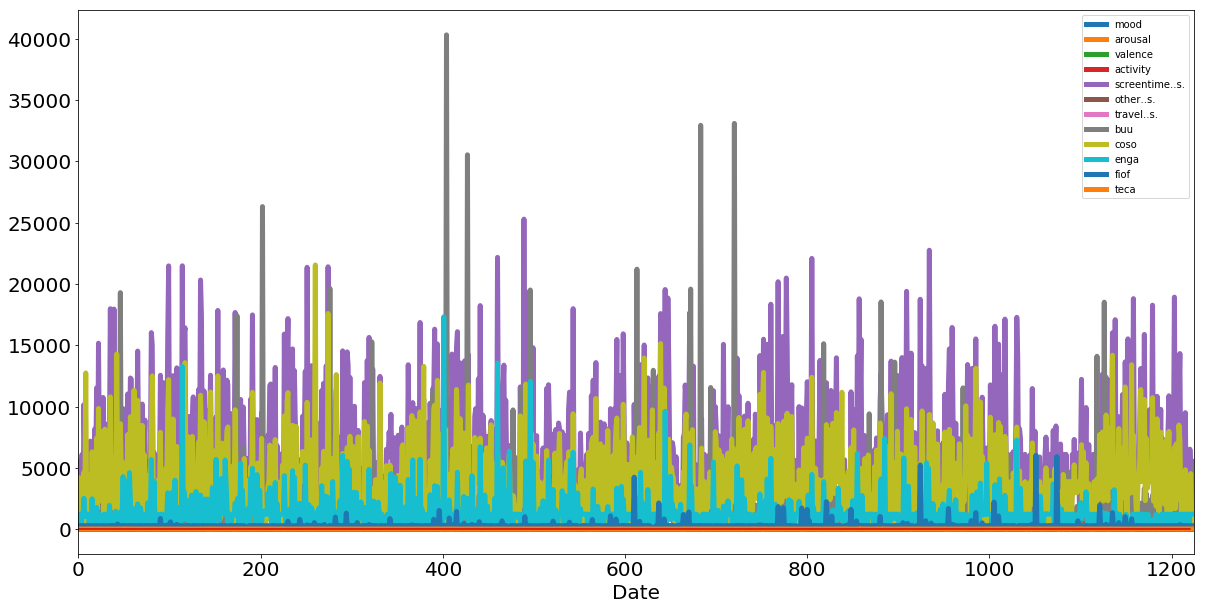

In [15]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

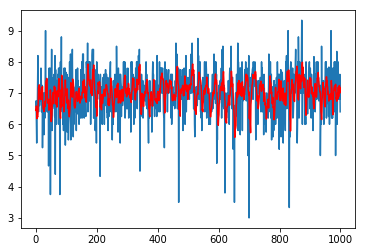

In [16]:
#zoom plot
pyplot.plot(test[0:1000])
pyplot.plot(predictions[0:1000], color='red')
pyplot.show()

Window = 3

In [17]:
#Prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

#walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    y_hat = mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(y_hat)
    history.append(obs)
    print('Predicted = %f, Expected = %f' % (y_hat, obs))
    


Predicted = 6.555556, Expected = 6.400000
Predicted = 6.577778, Expected = 6.166667
Predicted = 6.522222, Expected = 6.600000
Predicted = 6.388889, Expected = 6.750000
Predicted = 6.505556, Expected = 6.000000
Predicted = 6.450000, Expected = 5.400000
Predicted = 6.050000, Expected = 6.600000
Predicted = 6.000000, Expected = 6.400000
Predicted = 6.133333, Expected = 7.200000
Predicted = 6.733333, Expected = 8.200000
Predicted = 7.266667, Expected = 7.500000
Predicted = 7.633333, Expected = 6.400000
Predicted = 7.366667, Expected = 7.000000
Predicted = 6.966667, Expected = 7.200000
Predicted = 6.866667, Expected = 6.600000
Predicted = 6.933333, Expected = 6.800000
Predicted = 6.866667, Expected = 6.750000
Predicted = 6.716667, Expected = 6.800000
Predicted = 6.783333, Expected = 7.000000
Predicted = 6.850000, Expected = 7.800000
Predicted = 7.200000, Expected = 7.400000
Predicted = 7.400000, Expected = 6.400000
Predicted = 7.200000, Expected = 7.250000
Predicted = 7.016667, Expected = 7

Predicted = 6.650000, Expected = 7.200000
Predicted = 6.916667, Expected = 7.200000
Predicted = 7.400000, Expected = 6.200000
Predicted = 6.866667, Expected = 7.000000
Predicted = 6.800000, Expected = 7.600000
Predicted = 6.933333, Expected = 5.400000
Predicted = 6.666667, Expected = 7.600000
Predicted = 6.866667, Expected = 7.333333
Predicted = 6.777778, Expected = 7.200000
Predicted = 7.377778, Expected = 6.250000
Predicted = 6.927778, Expected = 7.200000
Predicted = 6.883333, Expected = 6.600000
Predicted = 6.683333, Expected = 6.666667
Predicted = 6.822222, Expected = 7.000000
Predicted = 6.755556, Expected = 6.800000
Predicted = 6.822222, Expected = 7.400000
Predicted = 7.066667, Expected = 8.000000
Predicted = 7.400000, Expected = 7.250000
Predicted = 7.550000, Expected = 8.000000
Predicted = 7.750000, Expected = 6.600000
Predicted = 7.283333, Expected = 8.000000
Predicted = 7.533333, Expected = 6.200000
Predicted = 6.933333, Expected = 6.400000
Predicted = 6.866667, Expected = 7

In [18]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 0.666


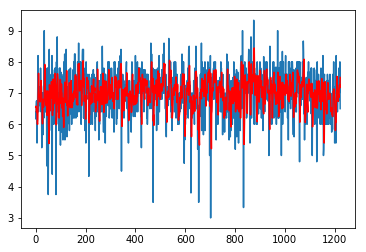

In [19]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [29]:
#zoom plot
import matplotlib
import matplotlib.pyplot as plt
pyplot.plot(test[0:600])
pyplot.plot(predictions[0:600], color='red')
plt.xlabel('Sample')
plt.ylabel('Mood')
plt.savefig('window.png')

window = 4

In [ ]:
X = series.values
window = 4
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

for t in range(len(test)):
    length = len(history)
    y_hat = mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(y_hat)
    history.append(obs)
    print('Predicted = %f, Expected = %f' % (y_hat, obs))



In [ ]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

In [ ]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
#zoom plot
pyplot.plot(test[0:600])
pyplot.plot(predictions[0:600], color='red')
pyplot.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error